## Training

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from reservoirpy.nodes import Ridge
from reservoirpy.nodes import Reservoir

readout = Ridge(ridge=1e-7)

Ridge regression e' una leggera generalizzazione di una regressione lineare. Ha un discount factor per non overfittare sui valori di training.

### Dataset di training

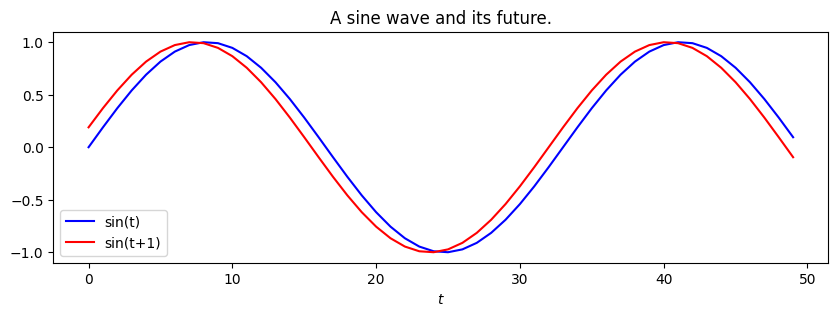

In [2]:
X = np.sin(np.linspace(0, 6*np.pi, 100)).reshape(-1, 1)


X_train = X[:50]
Y_train = X[1:51]

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(X_train, label="sin(t)", color="blue")
plt.plot(Y_train, label="sin(t+1)", color="red")
plt.legend()
plt.show()

per prima cosa bisogna inizializzare i train state

In [3]:
reservoir = Reservoir(100, lr=0.5, sr=0.9)
train_states = reservoir.run(X_train, reset=True)

Running Reservoir-0: 100%|██████████| 50/50 [00:00<00:00, 23244.87it/s]


## Fitting readout without Echo State Network connections
warmup serve a definire quanti timestamps scartare all'inizio. Siccome i primi step sono inizializzati randomicamente ci mette un po' prima di essere in grado di rappresentare i dati

In [4]:
readout = readout.fit(train_states, Y_train, warmup=0)

### Testing: run the model

Running Ridge-0: 100%|██████████| 50/50 [00:00<00:00, 108660.73it/s]


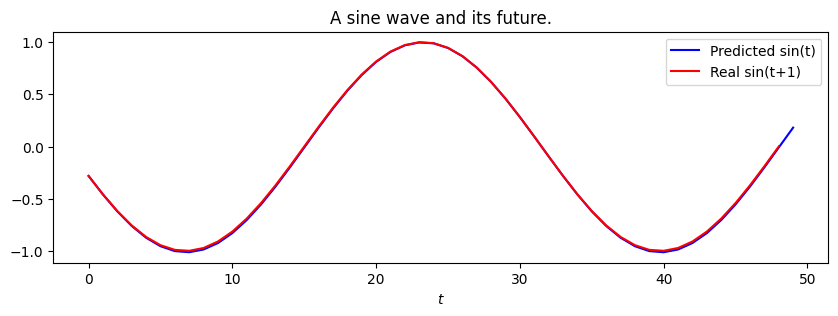

In [5]:
test_states = reservoir.run(X[50:])
Y_pred = readout.run(test_states)

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()

## Stessa identica cosa ma con MODEL:
Sostanzialmente zucchero sintattico che racchiude sia il node di reservvoir che il nodo di readout

In [6]:
reservoir = Reservoir(100, lr=0.5, sr=0.9)
readout = Ridge(ridge=1e-7)

esn_model = reservoir >> readout

In [7]:
esn_model = esn_model.fit(X_train, Y_train, warmup=10)

Running Model-0: 50it [00:00, 12259.03it/s]           
Running Model-0: 100%|██████████| 1/1 [00:00<00:00, 178.20it/s]

Fitting node Ridge-1...


In [8]:
print(reservoir.is_initialized, readout.is_initialized, readout.fitted)

True True True


### Testing: run the model

Running Model-0: 50it [00:00, 13926.24it/s]           


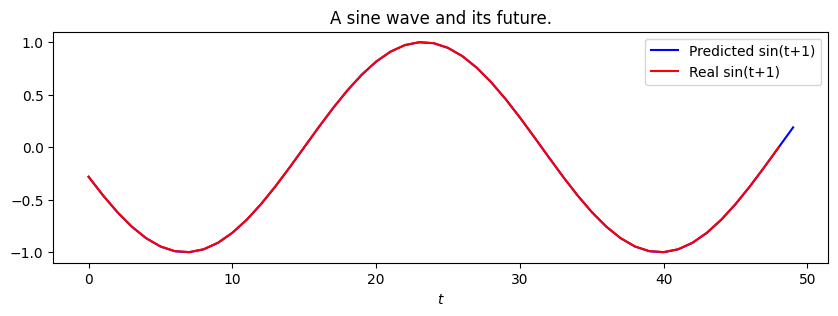

In [9]:
Y_pred = esn_model.run(X[50:])

plt.figure(figsize=(10, 3))
plt.title("A sine wave and its future.")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted sin(t+1)", color="blue")
plt.plot(X[51:], label="Real sin(t+1)", color="red")
plt.legend()
plt.show()